In [500]:
from numpy import max,zeros_like,conjugate,matrix, array, linspace, zeros,roots,poly, transpose, eye, block, exp, pi, sqrt, log, roots, real, imag
from control.matlab import tf, ss, step, lsim, acker, pole, zero, ss2tf, minreal, ss2tf
from control import step_response
from matplotlib.pyplot import plot, grid, show, figure, xlabel, ylabel, subplots
from scipy.optimize import fsolve
from scipy import linalg
from numpy.linalg import matrix_rank, det, inv
from sympy import Symbol, expand
import matplotlib.pyplot as plt
import numpy as np
import control
from math import e


import numpy as np
import control
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg
import sympy as sp

In [501]:
 ln = np.log  # assign the numpy log function to a new function called ln
 print(ln(10))

2.302585092994046


In [502]:

tfinal = 6
# Definição do sistema
A = np.array([[-5, 1],[-45, 0]])
B = np.array([[0],[45]])
C = np.array([[1, 0]])
D = np.array([[0]])

0.06729034514403771
6.7290345144037715


array([-2.5+6.2249498j, -2.5-6.2249498j])

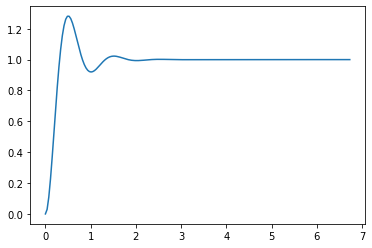

In [503]:
planta = ss(A,B,C,D)
s1 = pole(planta)[0]
wd = imag(s1)
wa = 15 * wd
T = 2*pi/wa

print(T)

tfinal = 100*T
print(tfinal)
xf,yf= step_response(planta,tfinal)
plt.plot(xf,yf)
G
pole(planta)

In [504]:
# Sobressinal percentual
Mp = (max(yf)-yf[-1])/(yf[-1]-yf[0])*100;
print("Mp (%) = \n",Mp)

Mp (%) = 
 28.101838692538156


In [505]:
s1 = pole(planta)[0]
wd = imag(s1)
wa = 15 * wd
T = 2*pi/wa

print(T)

tfinal = 100*T
print(tfinal)

0.06729034514403771
6.7290345144037715


In [506]:
# simulação com discretização dos integradores
# I(z)=T/(z-1)=Xi(z)/Xi_ponto(z)
# xi(k)=T*xi_ponto(k-1)+xi(k-1)

T = 0.01;
tfinal = tfinal;
Kmax = int(tfinal/T+1);
k = np.linspace(0, Kmax, Kmax+1)
u = np.ones(len(k));
x1 = np.zeros(len(k));
x2 = np.zeros(len(k));
x3 = np.zeros(len(k));
x1_ponto = np.zeros(len(k));
x2_ponto = np.zeros(len(k));
x3_ponto = np.zeros(len(k));
y = np.zeros(len(k));
e = np.zeros(len(k))
# condições iniciais (podem ser diferentes de zero)
x0 = np.matrix('0; 0');
x1[0] = x0[0];  #  para k = 0
x2[0] = x0[1];  #  para k = 0

x1_ponto[0] = 0;  #  para k = 0
x2_ponto[0] = 0;  #  para k = 0
y[0] = C[0,0]*x1[0]+C[0,1]*x2[0]+D*u[0];  #  para k = 0
e[0] = u[0]-y[0]

In [507]:
for j in range(1,Kmax):
    # Equações dos integradores
    x1[j]=T*x1_ponto[j-1]+x1[j-1];
    x2[j]=T*x2_ponto[j-1]+x2[j-1];    
    # Equação diferencial de estados:  Xponto=A*X+B*U
    x1_ponto[j]=A[0,0]*x1[j]+A[0,1]*x2[j]+B[0]*u[j];  
    x2_ponto[j]=A[1,0]*x1[j]+A[1,1]*x2[j]+B[1]*u[j];   
    # Equação de Saída: Y=C*X+D*U
    y[j] = C[0,0]*x1[j]+C[0,1]*x2[j]+D*u[j];
    e[0] = u[j]-y[j]


(0.0, 6.7290345144037715)

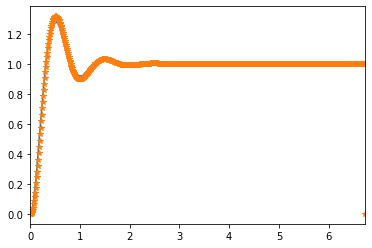

In [508]:
# comportamento do estado x1                       
plt.figure()
plt.plot(xf,yf,k*T,y,'*')
plt.xlim(0,tfinal)

(0.0, 6.7290345144037715)

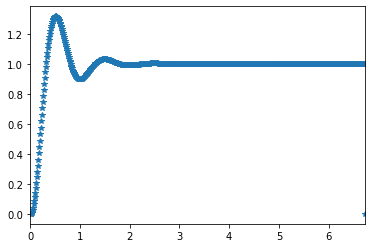

In [509]:
# comportamento do estado x1                       
plt.figure()
plt.plot(k*T,x1,'*')
plt.xlim(0,tfinal)

(0.0, 6.7290345144037715)

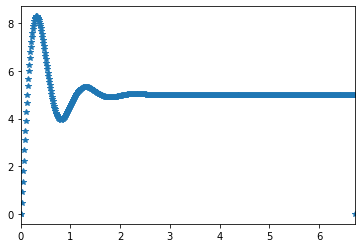

In [510]:

# comportamento do estado x1                       
plt.figure()
plt.plot(k*T,x2,'*')
plt.xlim(0,tfinal)

In [511]:
ts5_projeto = 0.5
zeta_projeto =0.6
wn_projeto = 3/(zeta_projeto*ts5_projeto)
print('wn=',wn_projeto)

wd_projeto = wn_projeto*np.sqrt(1-zeta_projeto**2)
print('wd=',wd_projeto)


wn= 10.0
wd= 8.0


In [512]:
T_2 = (2*np.pi)/(10*wd_projeto);
print('T=',T_2)

T= 0.07853981633974483


In [513]:
polos_desejados = np.roots([1, 2*zeta_projeto*wn_projeto,  wn_projeto**2])
polos_desejados = np.append(polos_desejados,5*np.real(polos_desejados[0]))
print(polos_desejados)

[ -6.+8.j  -6.-8.j -30.+0.j]


In [514]:
A_chapeu = np.block([[A, np.zeros_like(C.T)],[-C, 0]])
B_chapeu = np.block([[B],[0]])
K_chapeu = control.acker(A_chapeu, B_chapeu, polos_desejados)
K = matrix([[K_chapeu[0,0],K_chapeu[0,1]]])
k_i = -K_chapeu[0,2]
print('K_chapeu =', K_chapeu)

K_chapeu = [[  5.11111111   0.82222222 -66.66666667]]


In [515]:
print(K)

[[5.11111111 0.82222222]]


In [516]:
Matriz_controlabilidade = block([[A, B],[-C, 0]]);
print(Matriz_controlabilidade)

[[ -5   1   0]
 [-45   0  45]
 [ -1   0   0]]


In [517]:
print(K_chapeu)

[[  5.11111111   0.82222222 -66.66666667]]


In [518]:
autovalores, autovetores = linalg.eig(A_chapeu-B_chapeu*K_chapeu);
print('autovalores=',autovalores)

autovalores= [ -6.+8.j  -6.-8.j -30.+0.j]


In [519]:
print(K_chapeu[0,0])

5.111111111111111


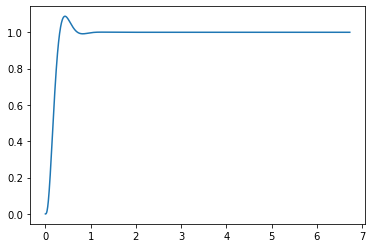

In [520]:
AA = np.block([[A-B*K, B*k_i],[-C, 0]]) 
BB = matrix([[0],[0],[1]])
CC = matrix([[1,0,0]])
DD = np.matrix([0])
planta_controlada = control.ss(AA, BB, CC, DD)
xf,yf = step_response(planta_controlada,tfinal)
plt.plot(xf,yf)

In [521]:
tfinal = 100*T_2
print(tfinal)

# Signal init
K = K
ki = k_i
Kmax = int(tfinal/T+1)
tamanho = Kmax+1
k = np.linspace(0, Kmax, tamanho)
ref = np.ones(len(k))


n = A.shape[0]
X = np.empty((tamanho, n))
X_ponto = np.empty((tamanho, n))
y = np.empty(tamanho)
erro = np.empty(tamanho)
u = np.empty(tamanho)
qsi = np.empty(tamanho)

# Unroll first iterations
j=0
condicao_inicial = matrix([[0],[0],[0]])
X[j, :] = condicao_inicial.T[:, :-1]
X_ponto[j, :] = np.zeros(n)
qsi[0] = condicao_inicial.T[:, -1]
u[0] = -(K[0,0]*X[0, 0]+K[0,1]*X[0, 1])+ki*qsi[0]
y[0] = C*np.matrix(X[0, :]).T + D*u[0]
erro[0] = ref[0]-y[0]

    # Simulate all
for j in range(1,Kmax+1):
    X[j, :] = T*X_ponto[j-1, :] + X[j-1, :]
    qsi[j] = T*erro[j-1]+qsi[j-1]
    u[j] = -(K[0,0]*X[j, 0]+K[0,1]*X[j, 1])+ki*qsi[j]
    X_ponto[j, :] = (A*np.matrix(X[j, :]).T + B*u[j]).T
    y[j] = C*np.matrix(X[j, :]).T + D*u[j]
    erro[j] = ref[j]-y[j] 

7.853981633974483


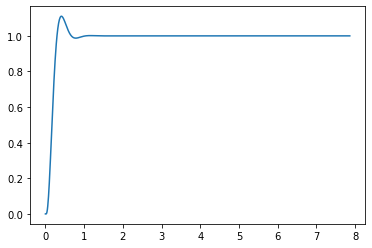

In [522]:
plt.plot(k*T,y)

In [523]:
N = control.obsv(planta.A, planta.C).T
print('Matriz de observalidade=')
print(N)
print('Rank=')
print(np.linalg.matrix_rank(N))



Matriz de observalidade=
[[ 1. -5.]
 [ 0.  1.]]
Rank=
2


In [524]:


polos_desejados = (np.roots([1, 2*zeta_projeto*wn_projeto,  wn_projeto**2]))

# Projeto
K_observador = control.acker(np.conjugate(A.T), np.conjugate(C.T), polos_desejados).T;
print('Ke =', K_observador)
AA = np.block([[A, np.zeros_like(A)],[K_observador*C, A-K_observador*C]]);
BB = np.block([[B],[B]]);
CC = np.matrix([[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0]]);
DD = np.zeros([2*len(A),1]);
observador = control.ss(AA, BB, CC, DD)

t = np.linspace(0, tfinal, 1000)
u = np.ones(len(t))
Y, t, X = control.matlab.lsim(observador, u, t, np.matrix([[0], [0], [0], [0]]))


Ke = [[ 7.]
 [55.]]


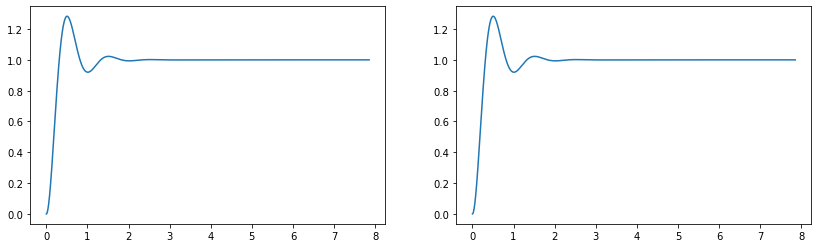

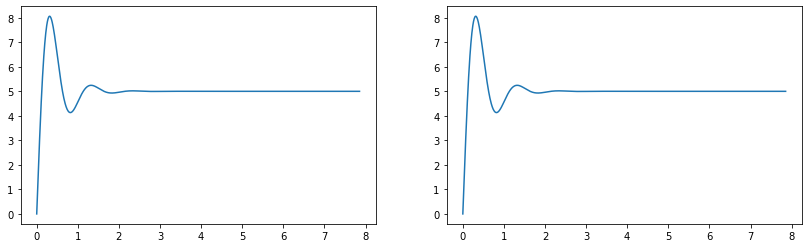

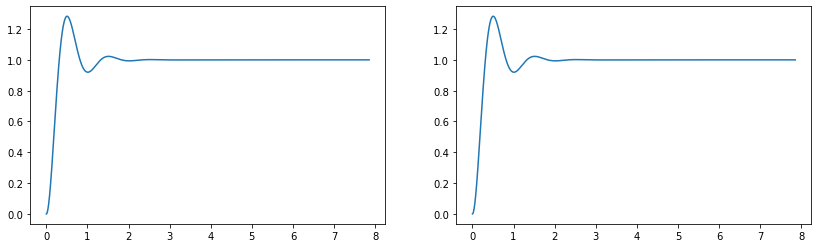

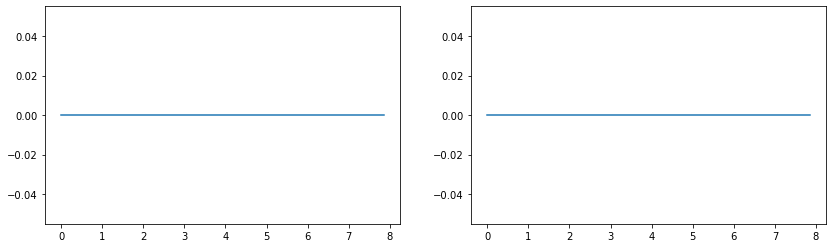

In [525]:
passo = int(X.shape[1]/2)
for j in range(0, passo):
    plt.subplots(1,2, figsize=(14, 4))
    plt.subplot(1,2,1)
    plt.plot(t, X[:, j])
    plt.subplot(1,2,2)
    plt.plot(t, X[:, j+passo])
        
passo = int(Y.shape[1]/2)
for j in range(0, passo):
    plt.subplots(1,2, figsize=(14, 4))
    plt.subplot(1,2,1)
    plt.plot(t, Y[:, j])
    plt.subplot(1,2,2)
    plt.plot(t, Y[:, j+passo])

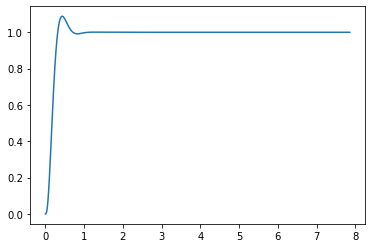

In [526]:
AA = np.block([[A, B*ki, -B*K],[-C, 0, np.zeros((1,2))], [K_observador*C, B*ki, A-B*K-K_observador*C]])
BB = np.block([[np.zeros((2,1))], [1], [np.zeros((2,1))]])
CC = np.block([[C, 0, np.zeros((1,2))]])
DD = np.matrix([0])

controlador_observador= control.ss(AA, BB, CC, DD)
x_cont_obs,y_cont_obs = step_response(controlador_observador,tfinal)

plt.plot(x_cont_obs,y_cont_obs)

In [527]:
T = T
# Signal init
K = K
ki = k_i
    
A = planta.A
B = planta.B
C = planta.C
D = planta.D
n = A.shape[0]

Kmax = int(tfinal/T+1)
index_max = Kmax+1
k = np.linspace(0, Kmax, index_max)
ref = np.ones(len(k))

A = planta.A
B = planta.B
C = planta.C
D = planta.D

n = A.shape[0]
X = np.empty((index_max, n))
X_ponto = np.empty((index_max, n))
X_obs = np.empty((index_max, n))
X_ponto_obs = np.empty((index_max, n))
y = np.empty(index_max)
y_obs = np.empty(index_max)
erro = np.empty(index_max)
u = np.empty(index_max)
qsi = np.empty(index_max)

# Unroll first iterations
j=0
condicao_inicial = np.matrix([[0], [0], [0], [0], [0]])
X[j, :] = condicao_inicial.T[:, :n]
X_obs[j, :] = condicao_inicial.T[:, n:n*2]
X_ponto[j, :] = np.zeros(n)
X_ponto_obs[j, :] = np.zeros(n)
qsi[j] = condicao_inicial.T[:, -1]
u[0] = -(K[0,0]*X[j, 0]+K[0,1]*X[j, 1])+ki*qsi[j]
y[j] = C*np.matrix(X[j, :]).T + D*u[j]
y_obs[j] = C*np.matrix(X[j, :]).T + D*u[j]
erro[j] = ref[j]-y[j]

# Simulate all
for j in range(1,Kmax+1):
    X[j, :] = T*X_ponto[j-1, :] + X[j-1, :]
    X_obs[j, :] = T*X_ponto_obs[j-1, :] + X_obs[j-1, :]
    qsi[j] = T*erro[j-1]+qsi[j-1]
    u[j] = -(K[0,0]*X[j, 0]+K[0,1]*X[j, 1])+ki*qsi[j] #shoudl K*X be matricial?
    X_ponto[j, :] = (A*np.matrix(X[j, :]).T + B*u[j]).T
    y[j] = C*np.matrix(X[j, :]).T + D*u[j]
    y_obs[j] = C*np.matrix(X_obs[j, :]).T + D*u[j]
    erro[j] = ref[j]-y[j] 
    X_ponto_obs[j, :] = (A*np.matrix(X[j, :]).T + B*u[j]).T + np.matrix(K_observador*(y[j]-y_obs[j])).T




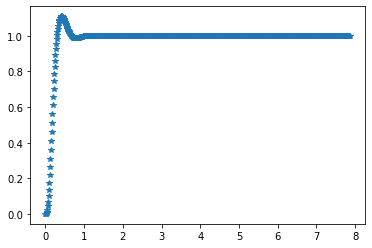

In [528]:
plt.plot(k*T,y,'*')
    


In [529]:
# Sobressinal percentual
Mp = (max(y)-y[-1])/(y[-1]-y[0])*100;
print("Mp (%) = \n",Mp)

Mp (%) = 
 11.01955728963567


In [530]:
tempo_esperado = 0.1
Kmax = int(tempo_esperado/T+1)
j = Kmax-1;
delta = 0;
while (delta < 0.05):
    delta = abs((y[j]-y[-1])/y[-1]);
    ts = T*k[j];
    j = j-1;
    
print("ts = \n",ts)

ts = 
 0.1


In [531]:
I = np.eye(2);


s = sp.symbols('s');
# entrada do tipo degrau
R = 1/s;

A = sp.Matrix(A);
B = sp.Matrix(B);
C = sp.Matrix(C);

M = C*((s*I-A)**-1)*B;
ess = sp.limit(s*R*(1-M[0]),s,0)
print('erro regime permanente=',ess)

erro regime permanente= 0
